In [ ]:
pip install pandas numpy tqdm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
file_path = '/content/FinalBalancedDataset.csv'

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

   Unnamed: 0  Toxicity                                              tweet
0           0         0   @user when a father is dysfunctional and is s...
1           1         0  @user @user thanks for #lyft credit i can't us...
2           2         0                                bihday your majesty
3           3         0  #model   i love u take with u all the time in ...
4           4         0             factsguide: society now    #motivation


Machine Learning Problem
Build a model in machine learning to predict the score of toxicity of text.

1.   Target Variable: Score (Categorical Column)
2.   It is a classification Model




Step 1: Identifying the Target Variable and Splitting the Data into Train and Test

In [ ]:
y = data["Toxicity"]
X = data[["tweet"]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=100)

Step 2: Data Preprocessing

1) Removing special characters using regular expressions.
2) Lowering the case of each word in the document.
3) Removing Stop Words.
4) Applying Stemming & Lemmatization.


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
#import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stemming = PorterStemmer()
lemmatizing = WordNetLemmatizer()

In [ ]:
pip install tqdm

In [ ]:
tqdm.pandas()

In [ ]:
def preprocessing(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemming.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizing.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
temp1_df = X_train["tweet"].progress_apply(lambda x : preprocessing(x,"lemma"))

temp1_df.head()

100%|██████████| 42558/42558 [01:27<00:00, 487.96it/s]


,0,1
18593,user first ride dad user splitscreen bordercol...,9
4520,user shopthemint giveaway win thanks whoohoo,6
37546,badshah ur pal stlabubadu threat apostate kufa...,24
45782,photo check background spook http co hx wghjazy,8
33258,hermosa jayy bring anotha bitch nah,6


In [ ]:
temp1_df.columns = ["clean_text_lemma","text_len_lemma"]

In [ ]:
temp1_df.head()

,clean_text_lemma,text_len_lemma
18593,user first ride dad user splitscreen bordercol...,9
4520,user shopthemint giveaway win thanks whoohoo,6
37546,badshah ur pal stlabubadu threat apostate kufa...,24
45782,photo check background spook http co hx wghjazy,8
33258,hermosa jayy bring anotha bitch nah,6


In [ ]:
X_train= pd.concat([X_train,temp1_df],axis=1)

X_train.head()

,tweet,clean_text_lemma,text_len_lemma
18593,@user this is me on my first ride out in my d...,user first ride dad user splitscreen bordercol...,9
4520,@user #shopthemint #giveaway #win thanks wh...,user shopthemint giveaway win thanks whoohoo,6
37546,"@badshah200 Ur pal @STLAbuBadu threat2 ""aposta...",badshah ur pal stlabubadu threat apostate kufa...,24
45782,Photo check for background spooks. http://t.co...,photo check background spook http co hx wghjazy,8
33258,&#8220;@Hermosa_Jayy: Can I bring anotha bitch...,hermosa jayy bring anotha bitch nah,6


In [ ]:
temp2_df = X_test["tweet"].progress_apply(lambda x : preprocessing(x,"lemma"))

temp2_df.head()

100%|██████████| 14187/14187 [00:40<00:00, 353.52it/s]


,0,1
24714,let try make frown go upside goodvibes smile e...,13
37199,yungcofgoa yearsahaitian need start mcbob will...,10
33121,cmre sum wrong pussy sweet smh,6
51862,rt rebelganja bookieg idk love skinny girl got...,10
2926,user user team new mc user amp show phillysupp...,11


In [ ]:
temp2_df.columns = ["clean_text_lemma","text_len_lemma"]

In [ ]:
temp2_df.head()

,clean_text_lemma,text_len_lemma
24714,let try make frown go upside goodvibes smile e...,13
37199,yungcofgoa yearsahaitian need start mcbob will...,10
33121,cmre sum wrong pussy sweet smh,6
51862,rt rebelganja bookieg idk love skinny girl got...,10
2926,user user team new mc user amp show phillysupp...,11


In [ ]:
X_test = pd.concat([X_test,temp2_df],axis=1)

X_test.head()

,tweet,clean_text_lemma,text_len_lemma
24714,lets try to make that #frown go upside-down! #...,let try make frown go upside goodvibes smile e...,13
37199,@YungCofGOA @12YearsAHaitian need to start mcb...,yungcofgoa yearsahaitian need start mcbob will...,10
33121,&#8220;@CMRE24 &#8220;Sum wrong with the pussy...,cmre sum wrong pussy sweet smh,6
51862,RT @rebelGANJA: &#8220;@1BookieG: Idk why I lo...,rt rebelganja bookieg idk love skinny girl got...,10
2926,ð @user @user own team up with #new #mc @u...,user user team new mc user amp show phillysupp...,11


Step 3: Vectorizing the text

Applying TFIDF(Term Frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf= vectorizer.fit_transform(X_train['clean_text_lemma'])

In [ ]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train features:", type(X_train_tfidf))

print("Shape of input data:", X_train_tfidf.shape)

Total unique words: 49032
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (42558, 49032)


In [ ]:
X_test_tfidf= vectorizer.transform(X_test["clean_text_lemma"])

In [ ]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train features:", type(X_test_tfidf))

print("Shape of input data:", X_test_tfidf.shape)

Total unique words: 49032
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (14187, 49032)


Step 4: Training Phase

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Function to evaluate a classifier
def evaluate_classifier(clf, X_train, y_train, X_test, y_test, name):
    clf.fit(X_train, y_train)  # Train classifier
    y_pred = clf.predict(X_test)  # Predict on test data

    # Check if the classifier has predict_proba method to use for ROC-AUC
    has_proba = hasattr(clf, "predict_proba")

    # Calculate Precision, Recall, and F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    # Generate and print Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}")

    # Compute and plot ROC-AUC if applicable
    if has_proba:
        probs = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"ROC-AUC plot not available for {name} due to lack of probability estimates.")

Decision Tree - Precision: 0.92, Recall: 0.92, F1-Score: 0.92
Confusion Matrix for Decision Tree:
[[7675  477]
 [ 478 5557]]


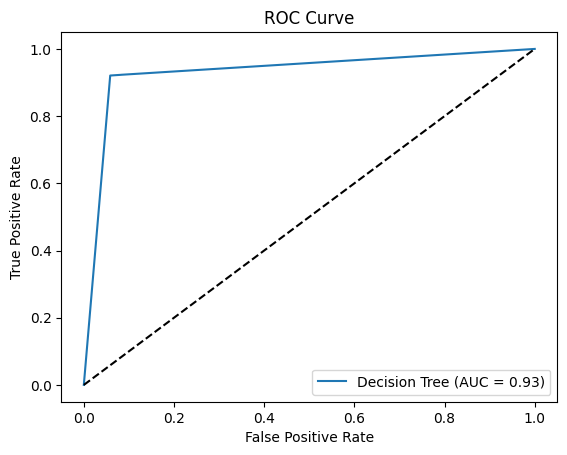

In [ ]:
# Decision Tree
evaluate_classifier(DecisionTreeClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test, "Decision Tree")

Random Forest - Precision: 0.93, Recall: 0.92, F1-Score: 0.93
Confusion Matrix for Random Forest:
[[7760  392]
 [ 467 5568]]


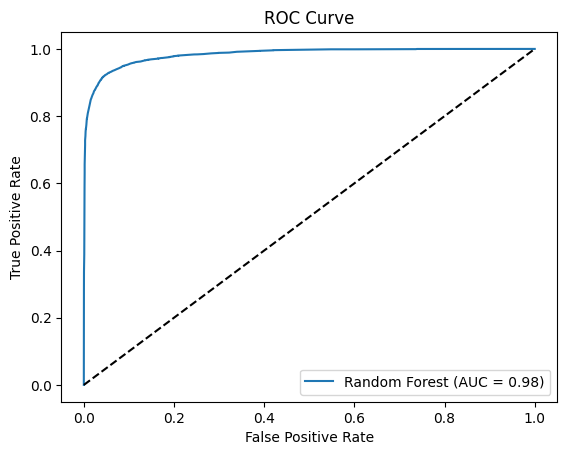

In [ ]:
# Random Forest
evaluate_classifier(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest")



Naive Bayes - Precision: 0.91, Recall: 0.90, F1-Score: 0.91
Confusion Matrix for Naive Bayes:
[[7625  527]
 [ 601 5434]]


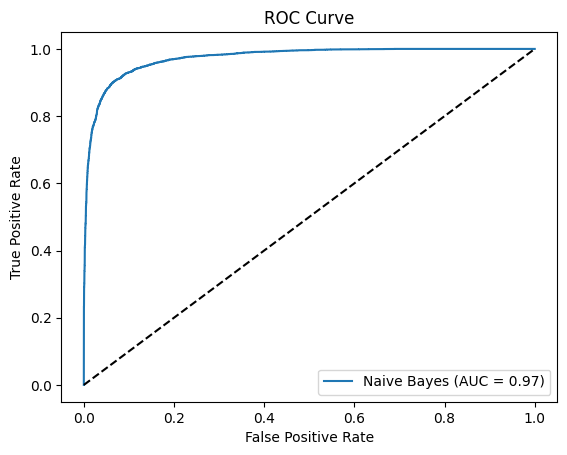

In [ ]:
 # Naive Bayes
evaluate_classifier(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test, "Naive Bayes")



K-NN - Precision: 0.92, Recall: 0.12, F1-Score: 0.21
Confusion Matrix for K-NN:
[[8085   67]
 [5304  731]]


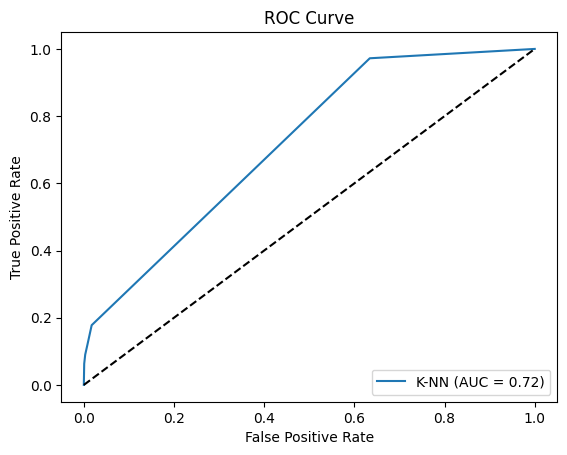

In [ ]:
# K-NN
evaluate_classifier(KNeighborsClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test, "K-NN")


In [ ]:
# SVM classifier
# evaluate_classifier(SVC(), X_train_tfidf, y_train, X_test_tfidf, y_test, "Support Vector Machine")